# RAID UI : Notebook Edition

In [1]:

import os
import math
import sys
import imp
import requests
import json

import numpy as np
import pandas as pd

import ogr
import gdal
import geopandas as gpd
from shapely.geometry import Point
from pyproj import Proj, transform
from shapely.geometry.linestring import LineString

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from skimage.graph import route_through_array


cur_dir=os.getcwd()

modulePath=os.path.join(cur_dir,os.pardir)
sys.path.insert(0, modulePath)

import raidnr.bwgrid.grid as Grid
import raidnr.bwgrid.grid_transformations as gt
from raidnr.config import GRANULARITY, METRICS, URL


import flask_UI.tasks as tsk

C:\Users\brydenwood\Desktop\test_projects\19029_raid_nr\flask_UI\OutputFiles\shp\clipped_speed


#### Create a New Session ID

In the RAID UI the codeName Id is generated through the combination of User Name - Password and Session ID

In [2]:
codeName="b6bed389221a03f4cbe726eb2281401c95a8492f3e22bb09d6f6d6f4f6f67e8c"

#### Initialize the Session

In [3]:
tsk.init_session(codeName)


{'result': 'process_done', 'print': '', 'plot': '', 'data': ''}

#### Create a bounding box

Specify a boudnig box in WGS84 coordinates in the form of [min_Longitude,min_Latitude,max_Longitude,max_Latitude]

In [4]:
bounding_box = [-1.8855285644531252,53.62224480831412,-1.7820167541503908,53.654100389869235]

In [5]:
data_payload = {"bbox":bounding_box}

tsk.create_bbox(data_payload,codeName)

returning corners for NW and SE corner cells 
C:\Users\brydenwood\Desktop\test_projects\19029_raid_nr\flask_UI\OutputFiles\shp\bbox\b6bed389f6f67e8c\bbox.shp


{'result': 'process_done', 'print': '', 'plot': '', 'data': ''}

#### or Load an existing bounding box

In [6]:
tsk.read_bbox("",codeName)

{'result': 'process_done', 'print': '', 'plot': '', 'data': ''}

#### Clip and rasterize the input data to the bounding box extends [docs](https://gitlab.com/bwtcreativetech/19029_raid_nr/blob/demo_test/docs/methodology_docs/data_processing_rasterization.md)

In [7]:
data_payload = ""

tsk.preprocess_context_data(data_payload,codeName)


---------------------------Preprocessing context data---------------------------
Clipping open data with bbox...
Offsetting clipped data...
Rasterizing context data (shapefiles):
	- Processed_Bridges.tif
	- Processed_Building.tif
	- Processed_CarChargingPoint.tif
	- Processed_Foreshore.tif
	- Processed_FunctionalSite.tif
	- Processed_ImportantBuilding.tif
	- Processed_NamedPlace.tif
	- Processed_RailwayStation.tif
	- Processed_RailwayTrack.tif
	- Processed_RailwayTunnel.tif
	- Processed_Road.tif
	- Processed_Roundabout.tif
	- Processed_SurfaceWater_Area.tif
	- Processed_SurfaceWater_Line.tif
	- Processed_TidalWater.tif
	- Processed_Woodland.tif
Clipping context data (rasters):
	Clipping Processed_DTM.tif


{'result': 'process_done', 'print': '', 'plot': '', 'data': ''}

#### Tile your data [docs](https://gitlab.com/bwtcreativetech/19029_raid_nr/blob/demo_test/docs/raidUI_docs/User_Guide.md#14-tile-clipped-data)

In [8]:
data_payload = ""

tsk.tile_data(data_payload,codeName)

Start Tilling...
Done


{'result': 'process_done',
 'print': '',
 'plot': '',
 'data': {'pointTo': 'leaflet_plot_tiles'}}

In [9]:
data_payload = ""

tsk.grid(data_payload,codeName)

Reading files...
Initializing Grid...


{'result': 'process_done', 'print': '', 'plot': '', 'data': ''}

In [10]:
data_payload = ""
tsk.init_existing_alignment(data_payload,codeName)
tsk.manager_init(data_payload,codeName)


---------------------------Processing alignment data----------------------------
Init alignment object:
Alignment object at 1649398655408
  ID: 2100
  length: 8106.04
  no of points: 2702
  granularity: 3.0m


{'result': 'process_done', 'print': '', 'plot': '', 'data': ''}

#### Select an Origin and Destination

In [11]:
import random
import math



def pick_point():
    
    minx,miny,maxx,maxy=tsk.bm.global_bbox
    
    points= []
    
    for i in range(2):
        
        start_lon=random.randrange(math.ceil(minx),math.floor(maxx))
        start_lat=random.randrange(math.ceil(miny),math.floor(maxy))
        
        point_=(start_lon,start_lat)
        points.append(point_)
        
    return points

start,end=pick_point()


In [109]:
start = tsk.bm.gt.raster_to_coords(tsk.bm.global_bbox,(1001,2001))
end = tsk.bm.gt.raster_to_coords(tsk.bm.global_bbox,(1367,2399))

#### Randomize the weights

In [12]:
w=[]
for i in tsk.bm.TOPO_LAYERS:
    w.append(random.randrange(0,20))

#### Generate a path [docs](https://gitlab.com/bwtcreativetech/19029_raid_nr/blob/demo_test/docs/methodology_docs/generate_path.md)

origin point  (-1.785552398949934, 53.64255206242725)
destination point  -1.8211325689991729
<class 'raidnr.core.alignment.Alignment'>
origin in bng (414275.0008420586, 416247.99969162967)
destination in bng (411927.00084026944, 414542.999689876)
<class 'raidnr.core.alignment.Alignment'>
ERROR: Coordinates out of the Grid. [414517.01906819 417352.9211118       0.        ] not within [407661.2503762188, 413988.1119170117, 414516.2503762188, 417519.1119170117] as [minx,maxx,miny,maxy]
NAA min-max: 0.0 1065.0938925747344
default to epsg:4326


{'result': 'process_done',
 'print': '',
 'plot': 'images/Sessions/plots/b6bed389f6f67e8c/plot_path_v1.png',
 'data': {'json_path': '76caf2f5-eafc-47cf-a713-bcbc68ee30f7_geopath_v1.json',
  'pointTo': 'leaflet_plot_alignment'}}

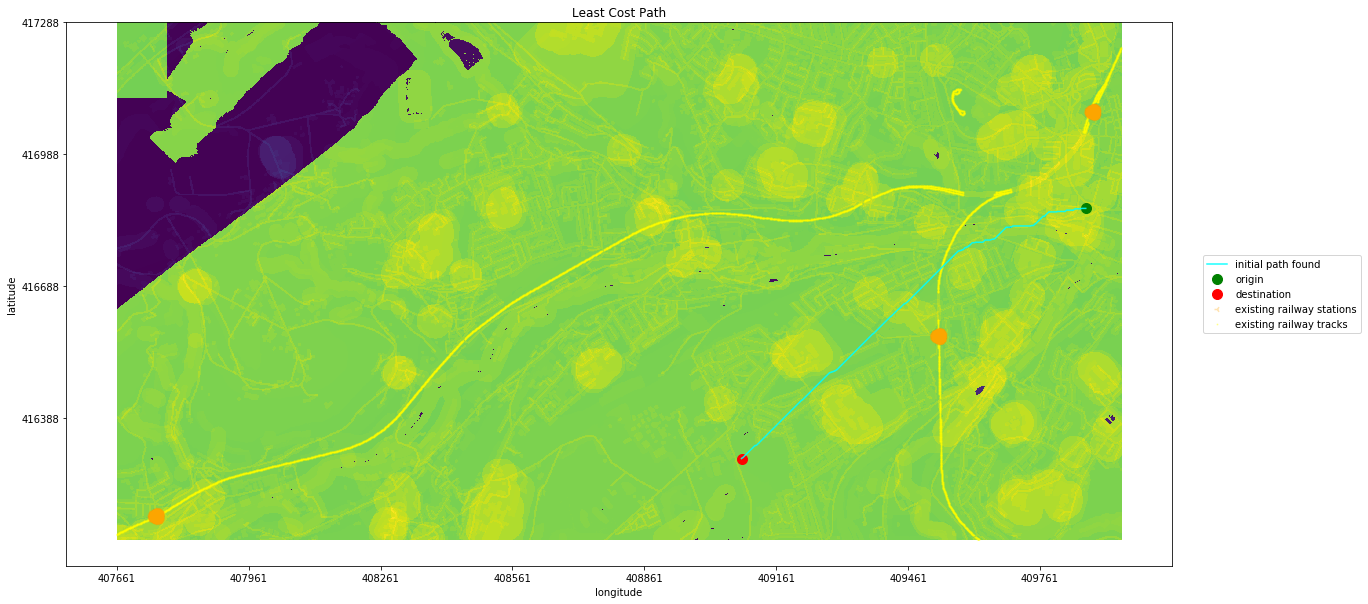

In [13]:
# 
data_payload = {"origin":tsk.bm.gt.bng_to_wgs(start),"destination":tsk.bm.gt.bng_to_wgs(end),"weights":w,"existing_alignment":True}

tsk.manager_design(data_payload,codeName)

#### Refining the path - single scenario  [docs]()

s from manager 500
Running curvature...
Running curvature...


C:\Users\brydenwood\Desktop\test_projects\19029_raid_nr\notebooks_to_publish\..\raidnr\util\ext_methods.py:265: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./curvature
C:\Users\brydenwood\Desktop\test_projects\19029_raid_nr\notebooks_to_publish\..\raidnr\util\ext_methods.py:259: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt((a+(b+c))*(c-(a-b))*(c+(a-b))*(a+(b-c))) / 4.
C:\Users\brydenwood\Desktop\test_projects\19029_raid_nr\notebooks_to_publish\..\raidnr\util\ext_methods.py:291: RuntimeWarning: invalid value encountered in double_scalars
  r = np.sum(a[max(0,n-ii):ii+n]) / ((ii+n) - max(0,n-ii))


Running curvature...
Running curvature...
default to epsg:4326


{'result': 'process_done',
 'print': '',
 'plot': 'images/Sessions/plots/b6bed389f6f67e8c/plot_refined_v1.png',
 'data': {'json_path': '76caf2f5-eafc-47cf-a713-bcbc68ee30f7_georefined_v1.json',
  'pointTo': 'leaflet_plot_alignment',
  'plot_title': 'path_plot'}}

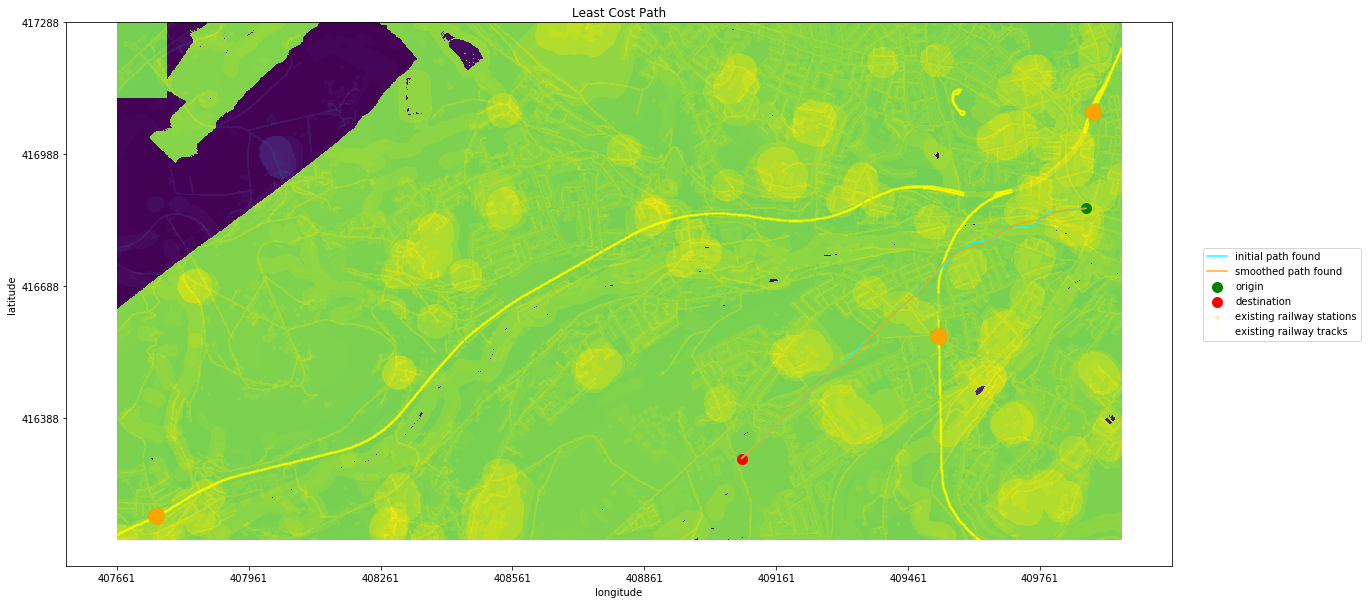

In [15]:
data_payload = {"type":"curvature","iterations":4,"s":500,"isloop":False}

tsk.manager_refine(data_payload,codeName)


#### Refining the path - mutliple scenarios [docs]()

In [ ]:
data_payload = {"type":"curvature","iterations":[5,10],"s":[100,1000],"isloop":True}

tsk.manager_refine(data_payload,codeName)


#### Analyze the generated path [docs]()

Running curvature...
Running permissible_speed...
Running actual_speed...
Running elevation_difference...
Running ground_elevation...
Running alignment_elevation...
Running gradient_ratio...
Running gradient_pct...
Running gradient_smooth...
Running gradient_labels...


C:\Users\brydenwood\Desktop\test_projects\19029_raid_nr\notebooks_to_publish\..\raidnr\bwgrid\grid.py:928: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor("white")


{'result': 'process_done',
 'print': '',
 'plot': 'images/Sessions/plots/b6bed389f6f67e8c/cost_alm.png',
 'data': {'plot_title': 'land_type_plot'}}

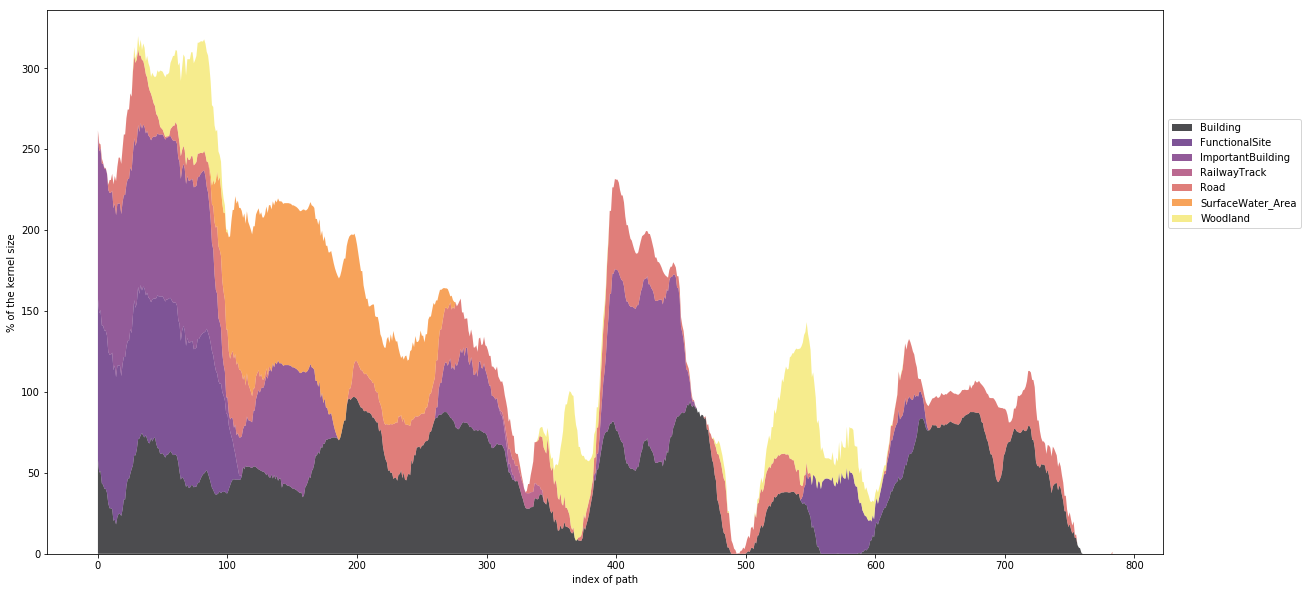

In [16]:
data_payload=""
tsk.manager_analyse_new_alm(data_payload,codeName)

#### Analyze refined path [docs]()

Running curvature...
Running permissible_speed...
Running actual_speed...
Running elevation_difference...
Running ground_elevation...
Running alignment_elevation...
Running gradient_ratio...
Running gradient_pct...
Running gradient_smooth...
Running gradient_labels...


C:\Users\brydenwood\Desktop\test_projects\19029_raid_nr\notebooks_to_publish\..\raidnr\util\ext_methods.py:787: RuntimeWarning: divide by zero encountered in true_divide
  diff_ = abs(np.diff(np.array(X)))/np.diff(np.array(Y))


{'result': 'process_done',
 'print': '',
 'plot': 'images/Sessions/plots/b6bed389f6f67e8c/cost_refined_alm.png',
 'data': {'plot_title': 'land_type_plot'}}

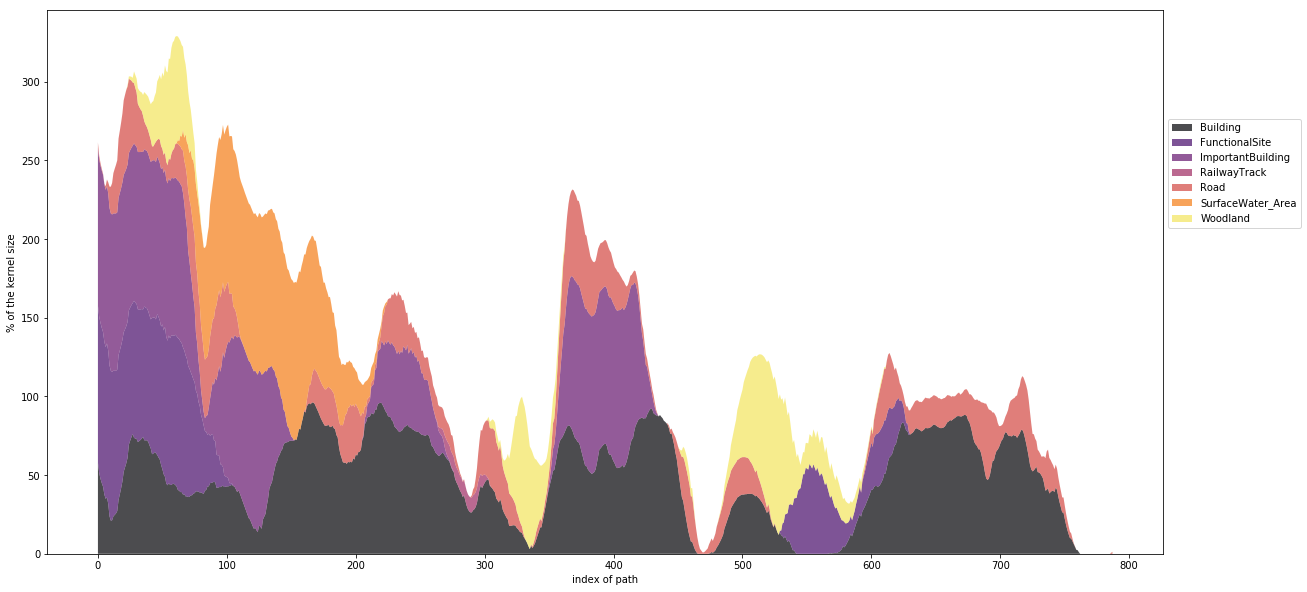

In [17]:
data_payload=""
tsk.manager_analyse_refined_alm(data_payload,codeName)